# Heart Attack Prediction Notebook
This notebook implements the full workflow for predicting heart attack risk using the US Heart Patients dataset, following the detailed Low Level Design (LLD).

## 1. Data Loading

In [42]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install pandas scikit-learn matplotlib seaborn joblib

In [43]:
%pip install numpy

import pandas as pd
import numpy as np
RANDOM_SEED = 13
np.random.seed(RANDOM_SEED)

# Load data
df = pd.read_csv('../data/US_Heart_Patients.csv')
df.shape, df.columns.tolist()

Note: you may need to restart the kernel to use updated packages.


((4240, 16),
 ['Gender',
  'age',
  'education',
  'currentSmoker',
  'cigsPerDay',
  'BP Meds',
  'prevalentStroke',
  'prevalentHyp',
  'diabetes',
  'tot cholesterol',
  'Systolic BP',
  'Diastolic BP',
  'BMI',
  'heartRate',
  'glucose',
  'Heart-Att'])

## 2. Exploratory Data Analysis (EDA)

In [44]:
# First 10 rows
df.head(10)

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,Female,43.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,Female,63.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,Female,45.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,Male,52.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,Male,43.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [45]:
# 5-point summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.579283,8.572875,32.00,42.00,49.000,56.00,70.0
education,4130.0,1.979903,1.019943,1.00,1.00,2.000,3.00,4.0
currentSmoker,4237.0,0.494218,0.500026,0.00,0.00,0.000,1.00,1.0
cigsPerDay,4209.0,9.001901,11.920742,0.00,0.00,0.000,20.00,70.0
BP Meds,4180.0,0.029665,0.169682,0.00,0.00,0.000,0.00,1.0
prevalentStroke,4231.0,0.005909,0.076650,0.00,0.00,0.000,0.00,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.000,1.00,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.000,0.00,1.0
tot cholesterol,4180.0,236.677273,44.616098,107.00,206.00,234.000,263.00,696.0
Systolic BP,4236.0,132.362370,22.039244,83.50,117.00,128.000,144.00,295.0


In [46]:
# Column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [47]:
# Data types
df.dtypes

Gender              object
age                float64
education          float64
currentSmoker      float64
cigsPerDay         float64
BP Meds            float64
prevalentStroke    float64
prevalentHyp       float64
diabetes           float64
tot cholesterol    float64
Systolic BP        float64
Diastolic BP       float64
BMI                float64
heartRate          float64
glucose            float64
Heart-Att            int64
dtype: object

In [48]:
# Missing values
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [49]:
# Outlier detection using IQR
outlier_counts = {}
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_counts[col] = outliers
outlier_counts

{'age': np.int64(0),
 'education': np.int64(0),
 'currentSmoker': np.int64(0),
 'cigsPerDay': np.int64(12),
 'BP Meds': np.int64(124),
 'prevalentStroke': np.int64(25),
 'prevalentHyp': np.int64(0),
 'diabetes': np.int64(109),
 'tot cholesterol': np.int64(56),
 'Systolic BP': np.int64(126),
 'Diastolic BP': np.int64(77),
 'BMI': np.int64(96),
 'heartRate': np.int64(75),
 'glucose': np.int64(188),
 'Heart-Att': np.int64(644)}

In [50]:
# Correlation matrix
corr = df.corr(numeric_only=True)
corr

,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
age,1.000000,-0.165584,-0.212868,-0.192650,0.123420,0.057811,0.306096,0.101539,0.262766,0.394171,0.205470,0.135013,-0.011286,0.121767,0.226166
education,-0.165584,1.000000,0.017627,0.008257,-0.011071,-0.035254,-0.081289,-0.037550,-0.022926,-0.129614,-0.061678,-0.136673,-0.055574,-0.034838,-0.053857
currentSmoker,-0.212868,0.017627,1.000000,0.769790,-0.049186,-0.033061,-0.103521,-0.044425,-0.046732,-0.130143,-0.107956,-0.166571,0.061614,-0.056546,0.018707
cigsPerDay,-0.192650,0.008257,0.769790,1.000000,-0.046348,-0.032709,-0.066986,-0.037112,-0.026347,-0.089327,-0.057158,-0.093346,0.074742,-0.058460,0.057923
BP Meds,0.123420,-0.011071,-0.049186,-0.046348,1.000000,0.117902,0.261561,0.052008,0.080869,0.254635,0.194487,0.101077,0.015461,0.051282,0.087759
prevalentStroke,0.057811,-0.035254,-0.033061,-0.032709,0.117902,1.000000,0.075048,0.006923,0.000143,0.057292,0.045341,0.025978,-0.017614,0.018463,0.062127
prevalentHyp,0.306096,-0.081289,-0.103521,-0.066986,0.261561,0.075048,1.000000,0.077964,0.164223,0.696447,0.615713,0.301014,0.147548,0.086504,0.176736
diabetes,0.101539,-0.037550,-0.044425,-0.037112,0.052008,0.006923,0.077964,1.000000,0.039732,0.113213,0.051396,0.087547,0.049328,0.617860,0.097485
tot cholesterol,0.262766,-0.022926,-0.046732,-0.026347,0.080869,0.000143,0.164223,0.039732,1.000000,0.208652,0.164058,0.115813,0.091466,0.046644,0.082508
Systolic BP,0.394171,-0.129614,-0.130143,-0.089327,0.254635,0.057292,0.696447,0.113213,0.208652,1.000000,0.784030,0.326623,0.183439,0.140251,0.216287


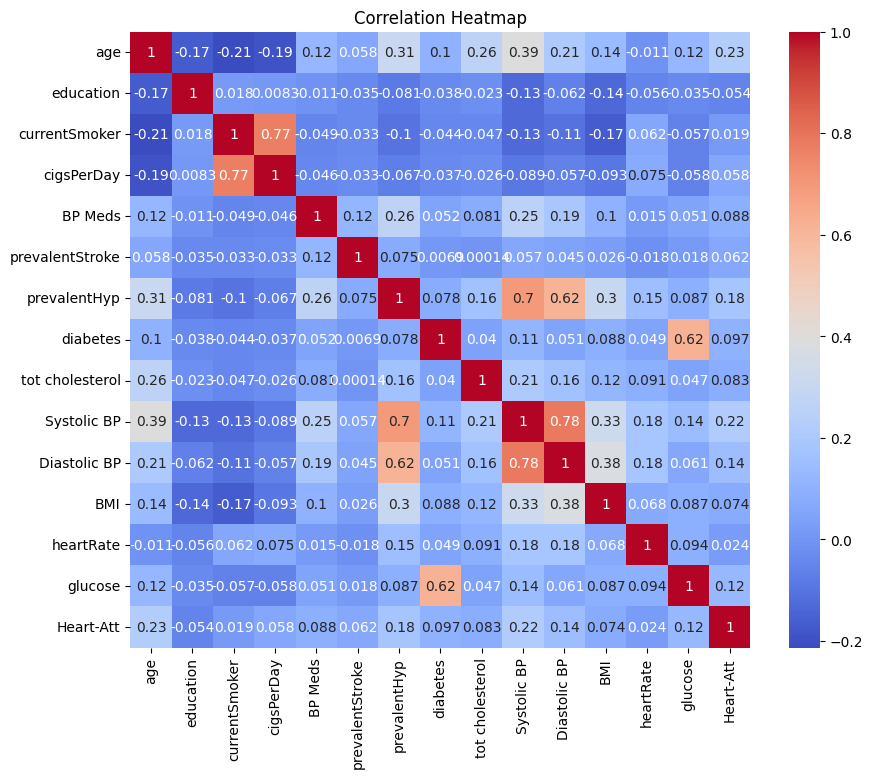

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

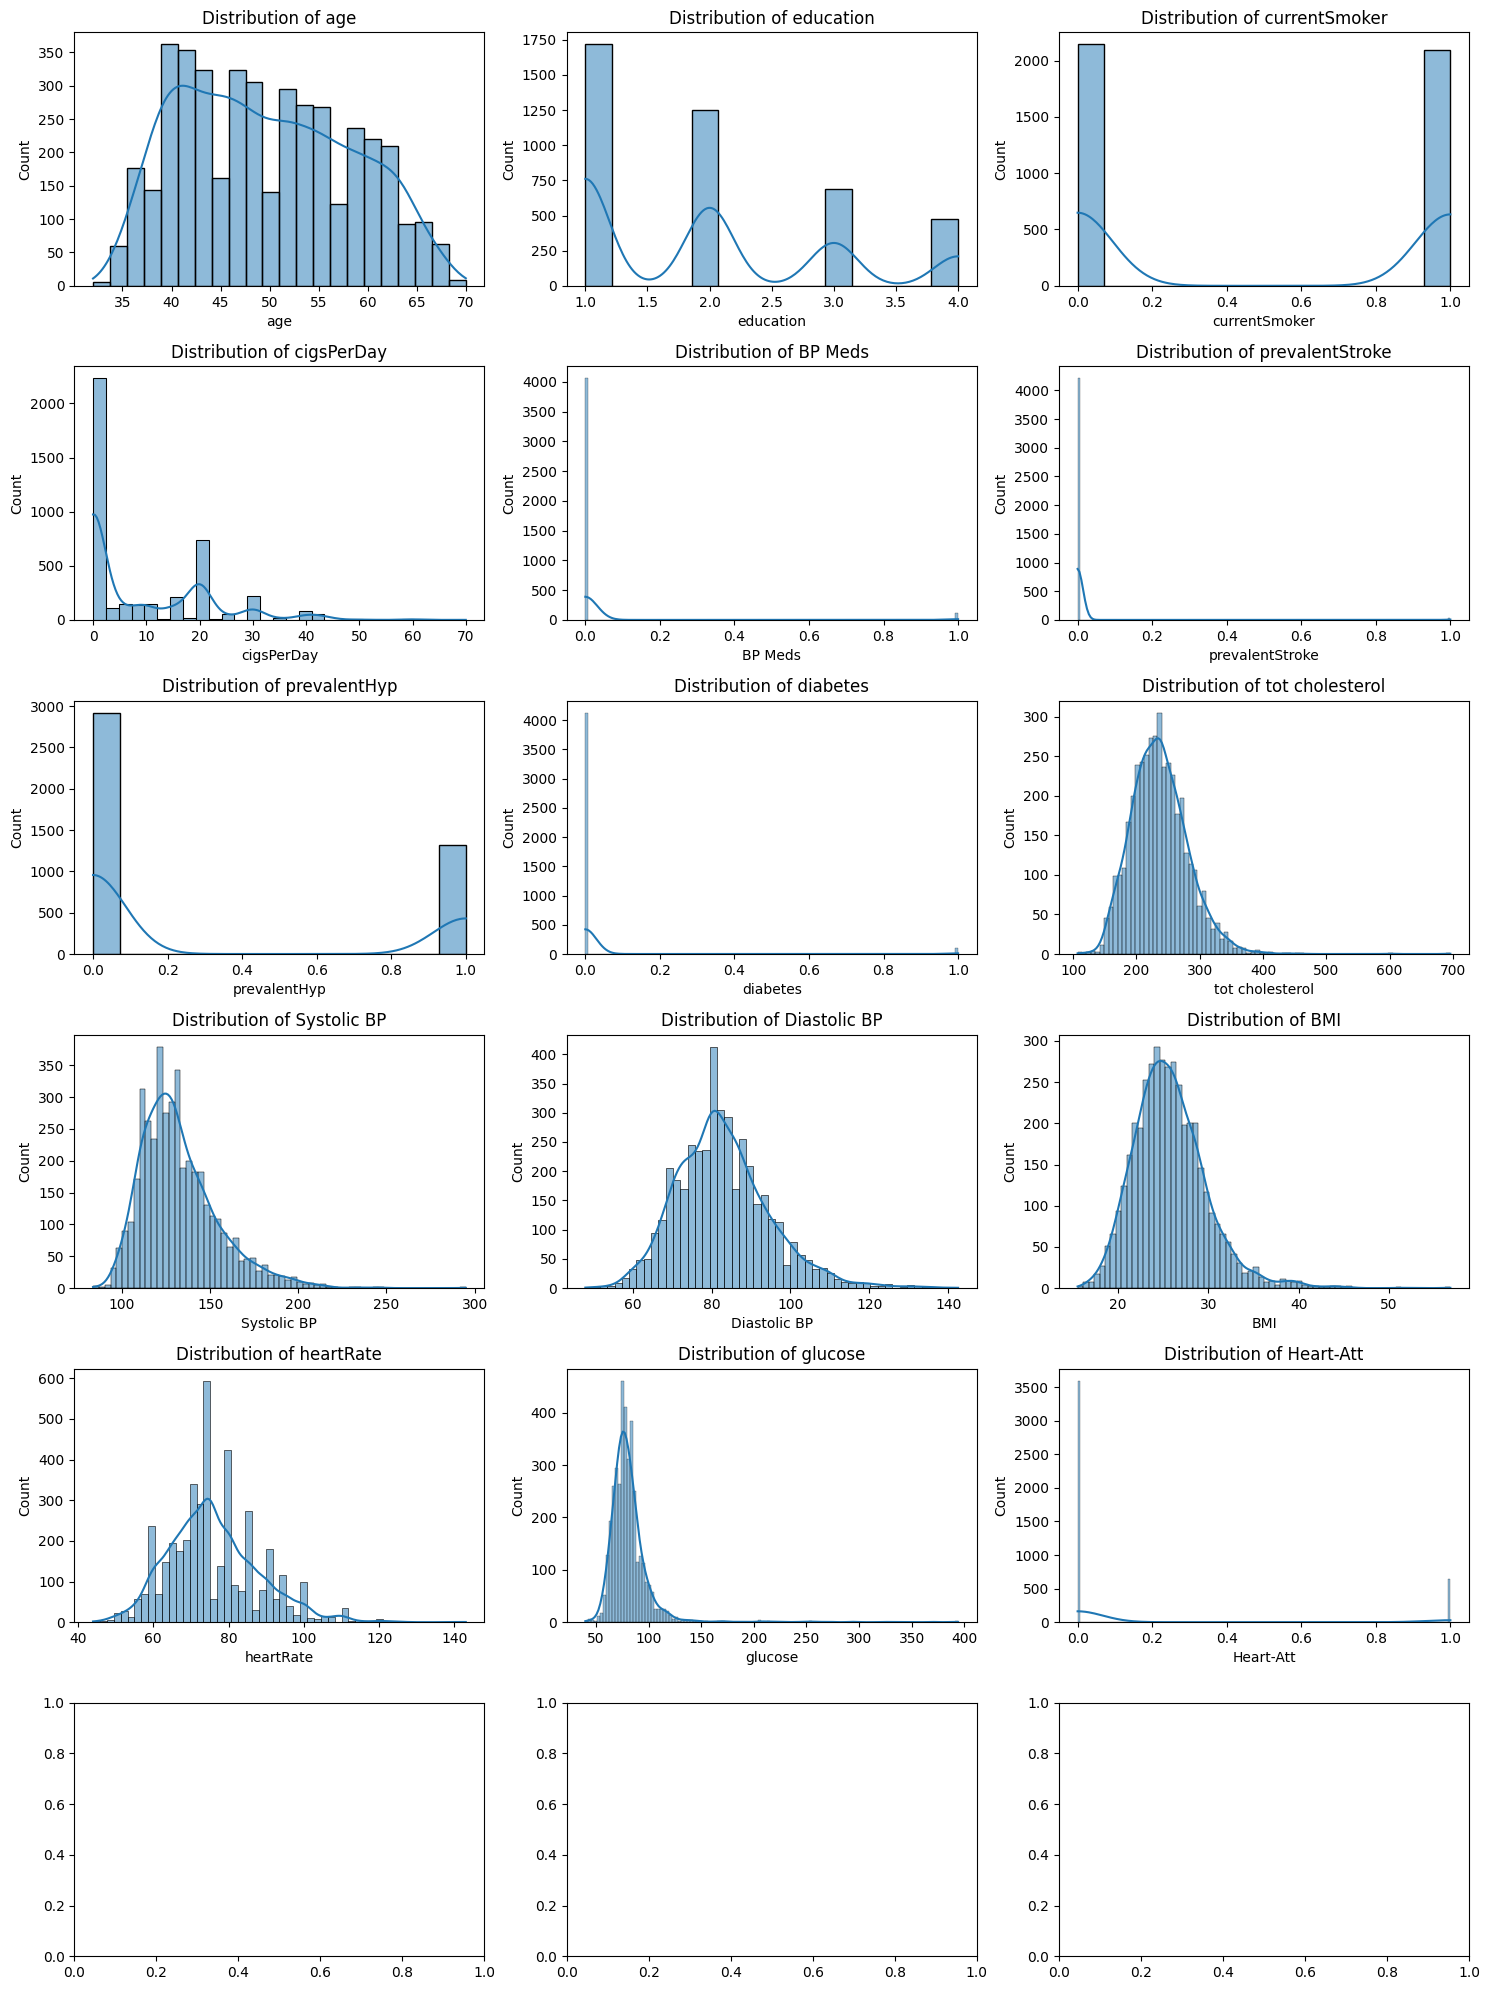

In [52]:
# Distribution plots
num_cols = df.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(len(num_cols)//3+1, 3, figsize=(15, 4*len(num_cols)//3))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

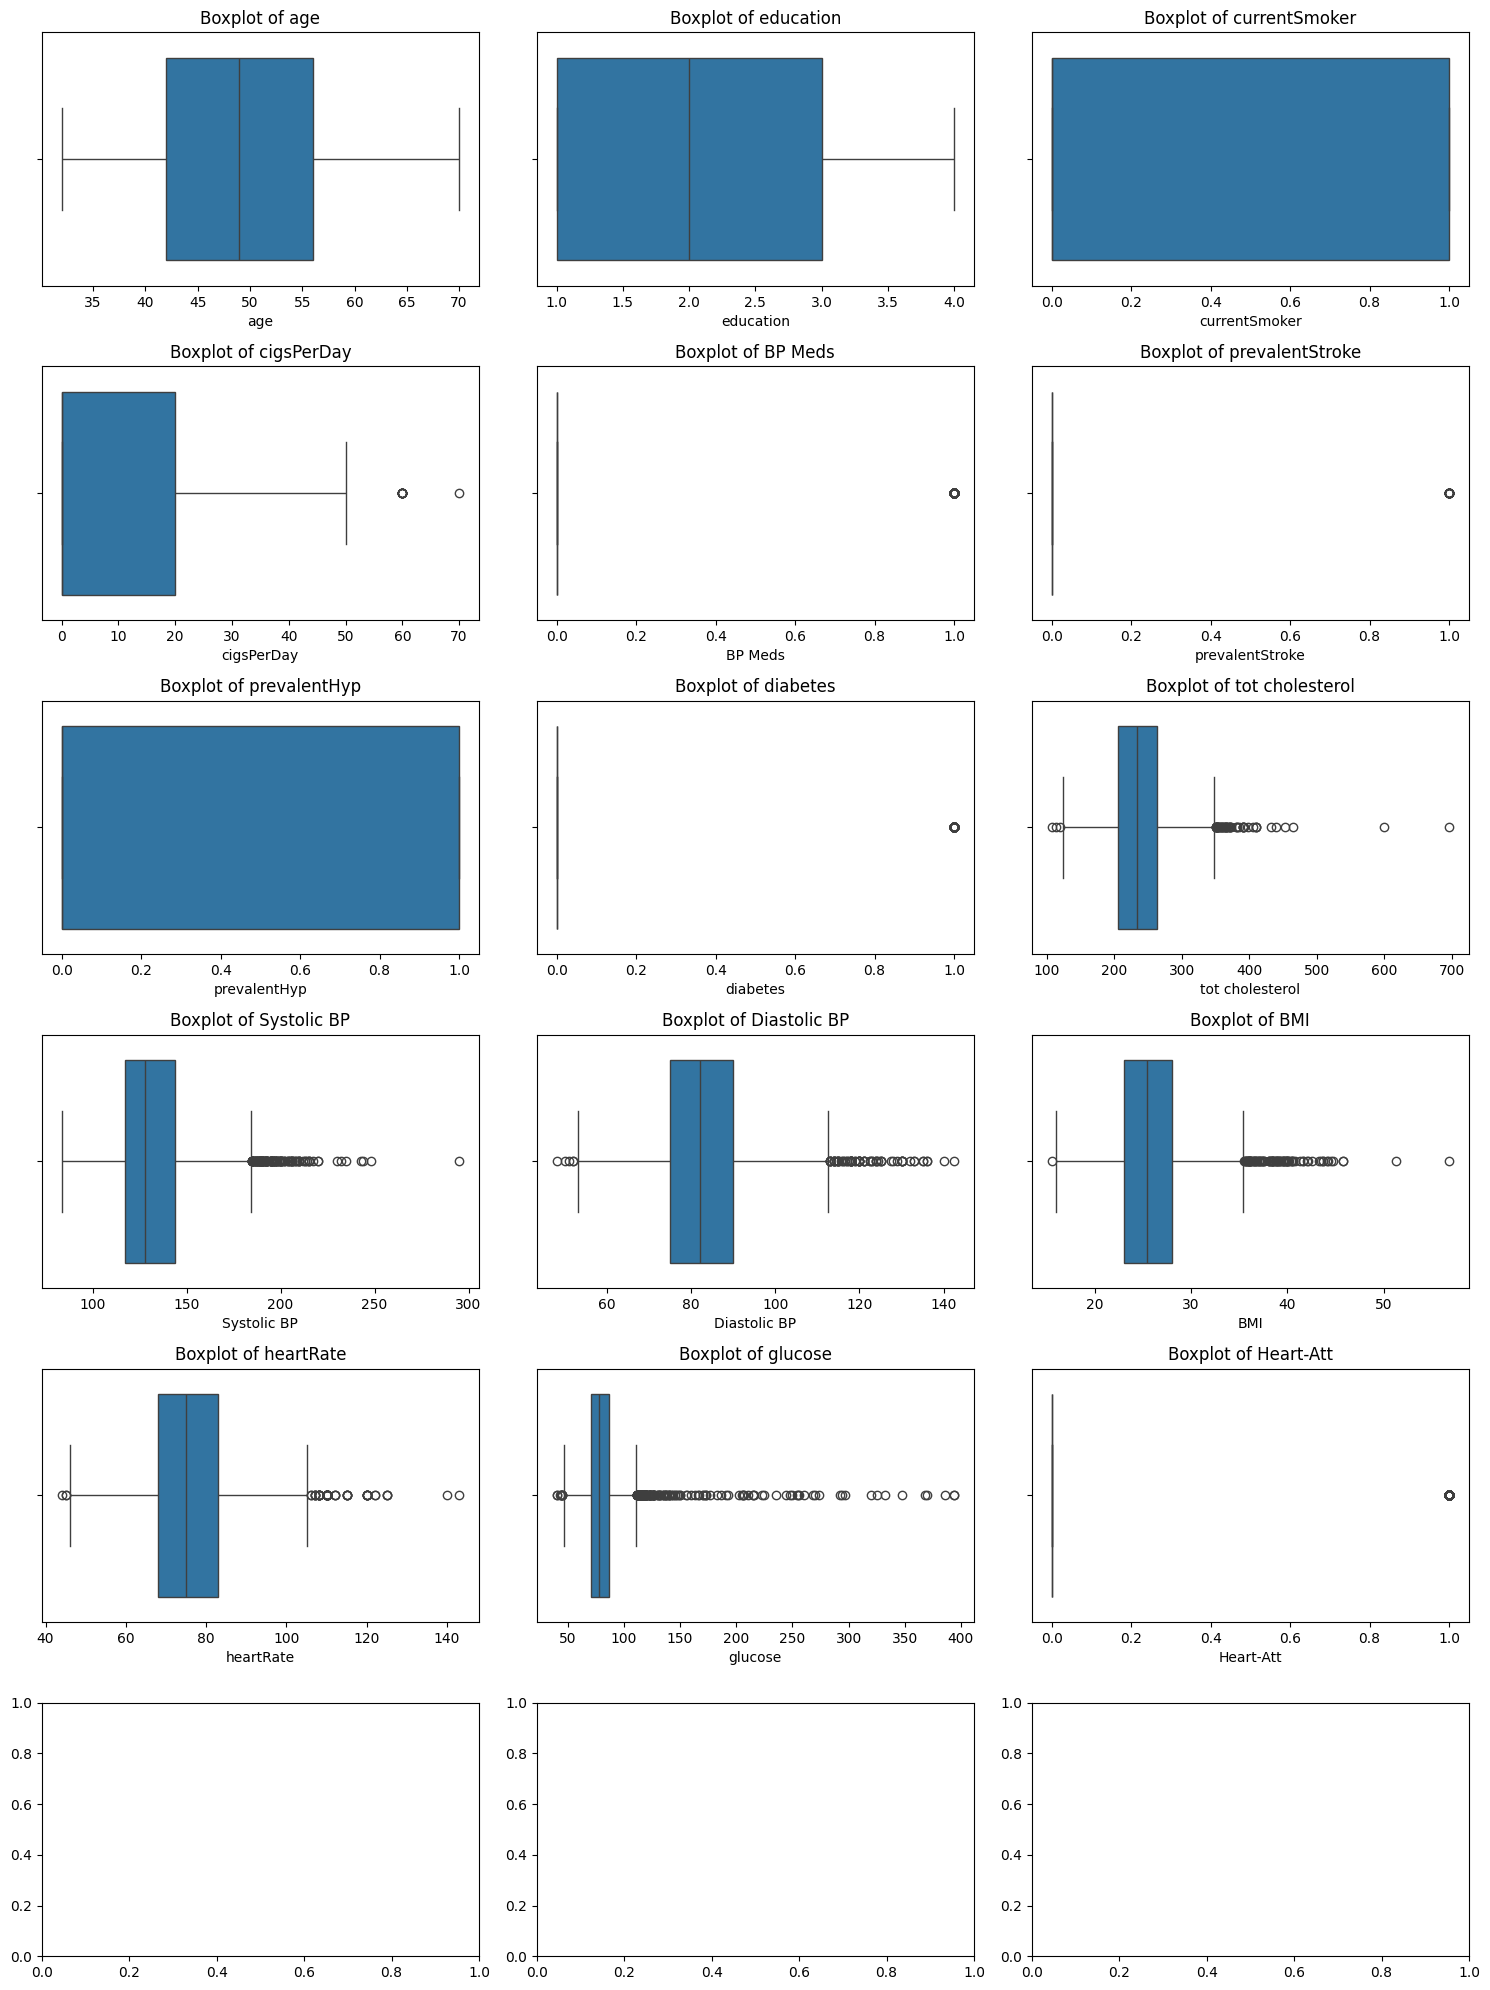

In [53]:
# Boxplots for outliers
fig, axes = plt.subplots(len(num_cols)//3+1, 3, figsize=(15, 4*len(num_cols)//3))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## 3. Data Preprocessing

In [54]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify features
target_col = 'Heart-Att'
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode target if categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    y = LabelEncoder().fit_transform(y.astype(str))

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [c for c in X.columns if c not in numeric_features]

# Impute missing values
numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy='median'))])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [55]:
# Outlier capping (Winsorization)
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

for col in numeric_features:
    X[col] = cap_outliers(X[col])

## 4. Data Splitting

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y
)
X_train.shape, X_test.shape

((2968, 15), (1272, 15))

## 5. Model Preparation & Evaluation

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=RANDOM_SEED))
])

param_grid = {
    'classifier__max_depth': [3, 5, 7, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(clf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

In [58]:
# Evaluation
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
print('F1 Score (Train):', f1_score(y_train, y_pred_train))
print('F1 Score (Test):', f1_score(y_test, y_pred_test))
print('Confusion Matrix (Test):', confusion_matrix(y_test, y_pred_test))
print('Classification Report (Test):', classification_report(y_test, y_pred_test))

F1 Score (Train): 1.0
F1 Score (Test): 0.25943396226415094
Confusion Matrix (Test): [[903 176]
 [138  55]]
Classification Report (Test):               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1079
           1       0.24      0.28      0.26       193

    accuracy                           0.75      1272
   macro avg       0.55      0.56      0.56      1272
weighted avg       0.77      0.75      0.76      1272



### Model Summary
- The best Decision Tree model was selected using GridSearchCV with 5-fold cross-validation.
- Hyperparameters tuned: max_depth, min_samples_split, min_samples_leaf.
- F1 score, confusion matrix, and classification report are provided for the test set.
- Feature importances and further analysis can be added as needed.

## 6. Model Artifacts

In [59]:
import joblib
joblib.dump(best_model, '../models/final_decision_tree_model.pkl')
print('✅ Model saved to ../models/final_decision_tree_model.pkl')

✅ Model saved to ../models/final_decision_tree_model.pkl


## 7. Inference API (see src/app.py)
A Flask API is provided in `src/app.py` to serve the trained model for real-time predictions.

- Endpoint: `/predict` (POST)
- Input: Patient data as JSON
- Output: Prediction (risk of heart attack)

See the Python file for implementation details.